# Filtrations

In [1]:
import numpy as np

In [2]:
import euchar.utils as u
import euchar.surface as s
import euchar.filtrations as f

In [3]:
from nice.plot import matplotlib_plot, discrete_scatter
from euchar.display import euler_curve_plot, euler_surface_plot

# 3d plots
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
np.random.seed(0)
m = 32
img1 = np.random.randint(0, 256, (m, m))
img2 = np.random.randint(0, 256, (m, m))
IMG1 = np.random.randint(0, 256, (m, m, m))
IMG2 = np.random.randint(0, 256, (m, m, m))

In [5]:
np.random.seed(0)
N = 100
pts2 = np.random.rand(N, 2)
pts3 = np.random.rand(N, 3)

In [6]:
simplices_2d, alpha_2d = f.alpha_filtration_2D(pts2)
density_2d = f.inverse_density_filtration(pts2, simplices_2d, n_neighbors=6)

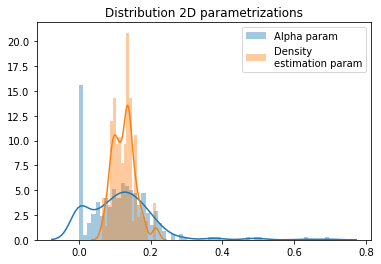

In [7]:
ax = sns.distplot(alpha_2d, label="Alpha param", bins=60)
ax = sns.distplot(density_2d, label="Density \nestimation param", bins=20)
ax.set(title="Distribution 2D parametrizations"); ax.legend();

In [8]:
simplices_3d, alpha_3d = f.alpha_filtration_3D(pts3)
density_3d = f.inverse_density_filtration(pts3, simplices_3d, n_neighbors=6)

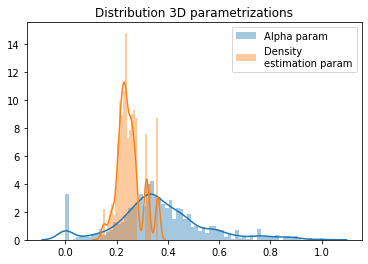

In [9]:
ax = sns.distplot(alpha_3d, label="Alpha param", bins=70)
ax = sns.distplot(density_3d, label="Density \nestimation param", bins=30)
ax.set(title="Distribution 3D parametrizations"); ax.legend();

***
### Test density

In [10]:
from sklearn.datasets import make_blobs
np.random.seed(1)
blobs, labels = make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=1)

In [11]:
_sim, _par = f.alpha_filtration_2D(blobs)
density_blobs = u.estimate_inverse_density(blobs, n=10)

Scatter plot of `blobs`. Radius is density.

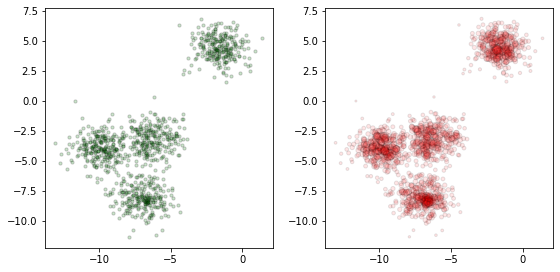

In [12]:
fig, ax = matplotlib_plot(1, 2, figsize=(4, 4))
ax[0].scatter(blobs[:,0], blobs[:,1], s=10, c="green", edgecolors="k", alpha=0.2)
ax[1].scatter(blobs[:,0], blobs[:,1], s=10/density_blobs, c="red", edgecolors="k", alpha=0.1)
fig.tight_layout()